In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Prepare and preview the dataset 

You will first create a synthetic dataset to act as input to the autoencoder. You can do that with the function below.

In [3]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

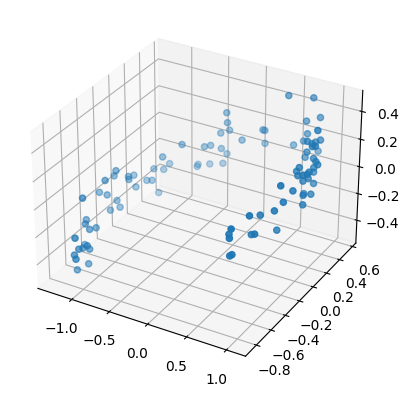

In [4]:
# use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], cmap='Reds');

In [5]:
X_train.shape

(100, 3)

In [7]:
X_train[:10]

array([[ 0.87947163,  0.27229131,  0.29964528],
       [ 0.90789413, -0.21400396,  0.03346277],
       [-1.08849095, -0.76178733, -0.31083586],
       [ 0.62739688, -0.51228137, -0.19001056],
       [ 0.65364701, -0.51089165, -0.17701572],
       [-1.17356088, -0.63679228, -0.37925227],
       [-1.08668627, -0.05394349, -0.10241068],
       [-0.57649494,  0.3076979 , -0.1074733 ],
       [ 0.98044221,  0.28806442,  0.16289803],
       [-0.2561041 ,  0.3836681 ,  0.21554944]])

# Build the model

In [12]:
encoder = tf.keras.models.Sequential([tf.keras.layers.Dense(2, input_shape=[3])]) 
decoder = tf.keras.models.Sequential([tf.keras.layers.Dense(3, input_shape=[2])])
autoencoder = tf.keras.models.Sequential([encoder, decoder])

In [13]:
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 2)                 8         
                                                                 
 sequential_3 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [16]:
autoencoder.compile(loss=tf.keras.losses.mse,
                    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1)
                   )

In [17]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 3ms/step - loss: 0.6001
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2966
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1953
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.1379
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0992
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0641
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0526
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0468
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 105/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 106/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 107/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 108/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 109/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 110/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 111/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 112/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 113/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 114/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 115/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 116/200
4/4 [==============================] - 0

In [23]:
# encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

4/4 [==============================] - 0s 1ms/step
input point: [0.87947163 0.27229131 0.29964528]
encoded point: [-1.130592    0.04380961]


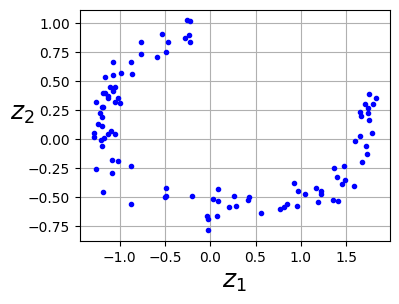

In [29]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:, 0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [30]:
# decode the encoder output
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

4/4 [==============================] - 0s 1ms/step
input point: [0.87947163 0.27229131 0.29964528]
encoded point: [-1.130592    0.04380961]
decoded point: [0.8447097  0.34884772 0.20372987]


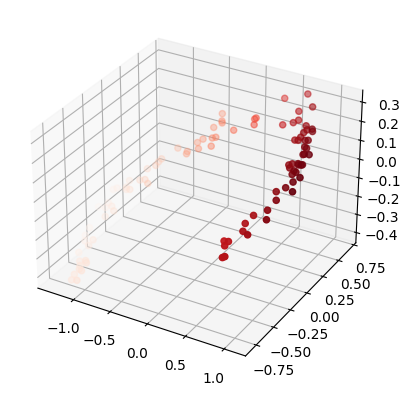

In [31]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');